# What is JSON?

JSON (JavaScript Object Notation) is a lightweight data-interchange format. It is easy for humans to read and write. It is easy for machines to parse and generate.

# What skills do you need to navigate it?

* Reading
* A willingness to try

# What can you do with it?

Make cool stuff! Go ahead, here are some examples to try yourself:

In [4]:
import requests #import the library that we use to make the http request
r = requests.get("https://www.loc.gov/?fo=json") # Get the JSON data by adding ?fo=json to the end of the URL
r.json() #print out the results:


{'featured_content': [{'action': 'Learn More About the 2017 National Book Festival',
   'banner': '/portals/static/home/images/featured/nbf-2017-L.jpg',
   'brief_title': '2017 National Book Festival',
   'classes': 'text-left',
   'description': 'Join More Than 100 Authors, Illustrators & Poets On Saturday, September 2',
   'link': 'http://www.loc.gov/bookfest/',
   'portal': '#NatBookFest',
   'thumb': '/portals/static/home/images/featured/nbf-2017-thumb-L.jpg',
   'title': '2017 National Book Festival'},
  {'action': 'Sign Up or Find Out More',
   'banner': '/portals/static/home/images/featured/nls-R-a.jpg',
   'brief_title': 'Free Braille & Talking Books',
   'classes': 'text-right',
   'description': 'Eligible Patrons Receive Free Braille & Talking Books',
   'link': '/programs/national-library-service-for-the-blind-and-physically-handicapped/about-this-service/',
   'portal': 'Service',
   'thumb': '/portals/static/home/images/featured/nls-thumb-a.jpg',
   'title': 'National Libr

In [10]:
#Since we already imported requests, we don't have to put "import requests"
r = requests.get("https://www.loc.gov/collections/?fo=json")
collections_json = r.json()
collections_json

{'breadcrumbs': [{'Library of Congress': 'https://www.loc.gov'},
  {'Digital Collections': 'https://www.loc.gov/collections/'}],
 'categories': ['about-the-collections', 'browse-the-collections'],
 'content': {'active': True,
  'count': 1,
  'index': 0,
  'link': 'https://www.loc.gov/collections/?fo=json',
  'results': [{'access_restricted': False,
    'aka': ['http://www.loc.gov/collections/papal-transition-2005-web-archive/about-this-collection/',
     'http://www.loc.gov/collections/papal/',
     'http://www.loc.gov/collections/papal-transition-2005-website-archives/',
     'http://lccn.loc.gov/2007700182',
     'http://www.loc.gov/item/2007700182/',
     'http://hdl.loc.gov/loc.natlib/collnatlib.00000010',
     'http://www.loc.gov/resource/collnatlib.00000010/'],
    'campaigns': [],
    'contributor': ['library of congress'],
    'count': 194,
    'date': '2008',
    'dates': ['2005-01-01T00:00:00Z', '2008-01-01T00:00:00Z'],
    'description': ["<dl class='collection-capture-perio

# Ok so I got some text that looks like giberish, now what?
Now we can use a bit of Python to do cool stuff with it! Like how about we get all the titles of the collections:

In [11]:
for collection in collections_json["results"]:
    print(collection["title"])

Aaron Copland Collection
Abdul Hamid II Collection
Abraham Lincoln Papers at the Library of Congress
Afghanistan Web Archive
African American Perspectives: Pamphlets from the Daniel A. P. Murray Collection, 1818-1907
African American Photographs Assembled for 1900 Paris Exposition
African-American Band Music & Recordings, 1883-1923
After the Day of Infamy: "Man-on-the-Street" Interviews Following the Attack on Pearl Harbor
Alan Lomax Collection
Alan Lomax Collection of Michigan and Wisconsin Recordings
Albert Schatz Collection
Alexander Graham Bell Family Papers at the Library of Congress
Alexander Hamilton Stephens Papers
The Alfred Whital Stern Collection of Lincolniana
Amazing Grace
America at Work, America at Leisure: Motion Pictures from 1894-1915
America Singing: Nineteenth-Century Song Sheets
An American Ballroom Companion: Dance Instruction Manuals, ca. 1490-1920
American Choral Music
American Colony in Jerusalem, 1870-2006
American English Dialect Recordings: The Center for Ap

# Why does it stop after 40?
If we were to give you the data for all our collections it would take a really long time to return the information. So instead we break it into pages. The _pagination_ section of the json contains the information that you need to really get everything:

In [15]:
collections_json = requests.get("https://www.loc.gov/collections/?fo=json").json()

while True: #As long as we have a next page, go and fetch it
    for collection in collections_json["results"]: 
        print(collection["title"]) #print out the collection's title
    next_page = collections_json["pagination"]["next"] #get the next page url
    if next_page is not None: #make sure we haven't hit the end of the pages
        collections_json = requests.get(next_page).json()
    else:
        break #we are done and can stop looping
print("\n total %s" % collections_json["pagination"]["of"])


Aaron Copland Collection
Abdul Hamid II Collection
Abraham Lincoln Papers at the Library of Congress
Afghanistan Web Archive
African American Perspectives: Pamphlets from the Daniel A. P. Murray Collection, 1818-1907
African American Photographs Assembled for 1900 Paris Exposition
African-American Band Music & Recordings, 1883-1923
After the Day of Infamy: "Man-on-the-Street" Interviews Following the Attack on Pearl Harbor
Alan Lomax Collection
Alan Lomax Collection of Michigan and Wisconsin Recordings
Albert Schatz Collection
Alexander Graham Bell Family Papers at the Library of Congress
Alexander Hamilton Stephens Papers
The Alfred Whital Stern Collection of Lincolniana
Amazing Grace
America at Work, America at Leisure: Motion Pictures from 1894-1915
America Singing: Nineteenth-Century Song Sheets
An American Ballroom Companion: Dance Instruction Manuals, ca. 1490-1920
American Choral Music
American Colony in Jerusalem, 1870-2006
American English Dialect Recordings: The Center for Ap

Sailor's life


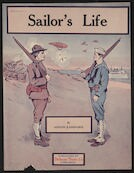

For the boys who did not return


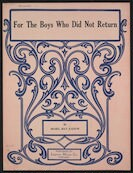

The  parting sailor boy's vow


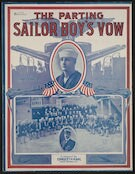

When are boys are home again


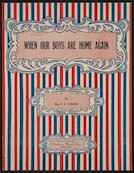

The  coal miner's battle, war or peace


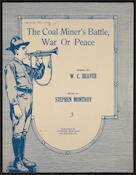

The  Kaiser has no place to go


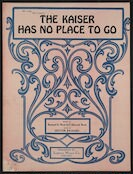

Sammy and Fritzie, or, America's watch on the Rhein song : combination one step - fox trot


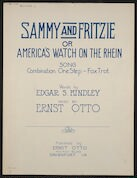

Our heroes


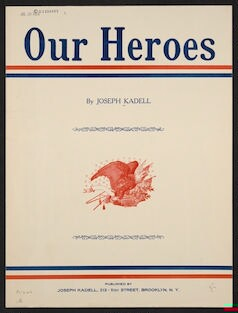

God speed the day we get the Kaiser's goat


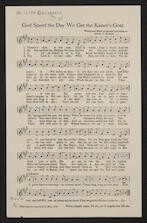

On to Berlin spirit of 1918


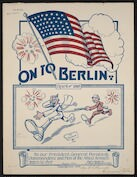

Hats off to U.S.A


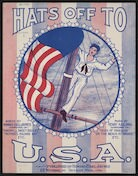

Hats off to U.S.A


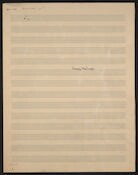

Now he is over


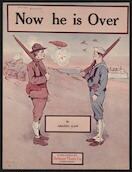

Kaiser Bill, world's assassin


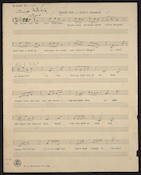

America, the greatest of them all


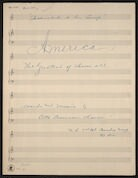

Good bye my boy we're proud to see you go


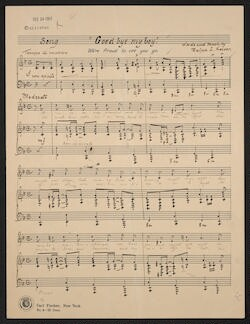

Ev-ry-bod-y takes you by the hand in home sweet home


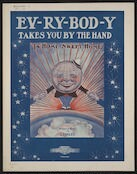

Arise! ye stalwart sons


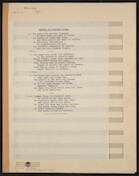

When I come back to you op. 75, no. 1


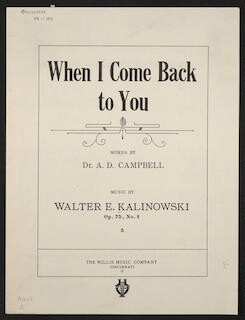

Since my boy has gone away


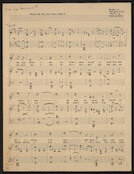

The  Irish Kaiser


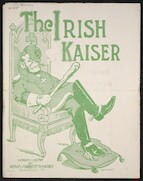

Safe for democracy New America


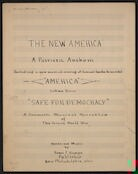

Safe for democracy Take your pen and sign the peace


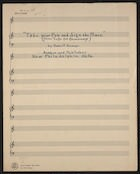

Safe for democracy When my boy comes marching home


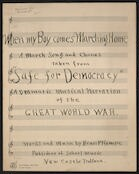

Lullaby of war while your daddy's far away


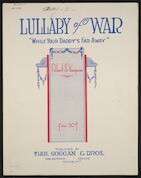

In [66]:
from IPython.display import Image, display

wwi_sheet_music = requests.get("https://www.loc.gov/collections/world-war-i-sheet-music/?fo=json").json()
for item in wwi_sheet_music["results"]:
    print(item["title"])
    display(Image("http:" + item["image_url"][0], format="jpeg"))
